In [124]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [125]:
 # Set the file paths for the CSVs using the Path class from the pathlib library
Combined_portfolio =  Path("combined_close_data_SP500_group_portfolio.csv")


# Read the daily closing prices of MSFT, set the `date` as a datetime index
combined_portfolio_df = pd.read_csv(Combined_portfolio, index_col=0, parse_dates=True, infer_datetime_format=True)

combined_portfolio_df.head()

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-19,2081.239990,36.108597,13.07,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,...,92.38,359.09,76.38,102.49,110.63,158.38,104.10,107.28,103.37,100.99
2015-11-20,2089.169922,36.404728,12.85,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,...,91.67,362.46,76.37,102.48,112.97,158.95,104.10,107.97,104.62,101.02
2015-11-23,2086.590088,36.219639,12.12,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,...,92.17,363.25,76.15,102.77,112.16,158.65,103.59,107.84,105.47,100.49
2015-11-24,2089.139893,36.515770,12.02,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,...,93.13,356.81,75.62,102.04,113.19,157.75,103.40,107.35,105.49,99.41
2015-11-25,2088.870117,36.330700,11.90,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,...,92.77,360.62,76.01,101.96,114.41,157.63,103.49,107.10,106.46,98.88


In [126]:
daily_returns = combined_portfolio_df.pct_change()
daily_returns.head()

daily_returns.dropna(inplace=True)

daily_returns.head()

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-20,0.003810,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.002066,0.008632,...,-0.007686,0.009385,-0.000131,-0.000098,0.021152,0.003599,0.000000,0.006432,0.012092,0.000297
2015-11-23,-0.001235,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.006254,-0.005473,...,0.005454,0.002180,-0.002881,0.002830,-0.007170,-0.001887,-0.004899,-0.001204,0.008125,-0.005246
2015-11-24,0.001222,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,0.006501,-0.006804,...,0.010416,-0.017729,-0.006960,-0.007103,0.009183,-0.005673,-0.001834,-0.004544,0.000190,-0.010747
2015-11-25,-0.000129,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.002405,-0.001713,...,-0.003866,0.010678,0.005157,-0.000784,0.010778,-0.000761,0.000870,-0.002329,0.009195,-0.005331
2015-11-27,0.000594,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.002617,0.005954,...,-0.000108,-0.006184,-0.000789,0.004021,-0.000612,0.002284,0.006667,0.003361,-0.002348,0.004956


In [127]:
# Drop stocks that are not being used in our portfolio
#Keep the following: AMT, ORCL, PPG, COST, MSFT, UNH, TROW, BLK, NVDA, FB, BABA, CRM, PFE, NFLX, SQ

Portfolio_returns= daily_returns.drop(columns=['GD','HD','WMT', 'VZ','MCD','SBUX','CLX','PSX','JNJ','MMM','UPS','ACN','NEE'])

Core_returns= Portfolio_returns

Core_returns

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,AMT,FB,MSFT,COST,BLK,TROW,UNH,PPG
2015-11-20,0.003810,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.008632,0.009976,0.004635,0.001658,0.009385,-0.000131,0.021152,0.012092
2015-11-23,-0.001235,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.005473,-0.003448,0.000000,0.002146,0.002180,-0.002881,-0.007170,0.008125
2015-11-24,0.001222,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,-0.006804,-0.011314,0.001107,-0.007709,-0.017729,-0.006960,0.009183,0.000190
2015-11-25,-0.000129,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.001713,-0.003121,-0.010323,0.001233,0.010678,0.005157,0.010778,0.009195
2015-11-27,0.000594,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.005954,0.000379,0.004470,0.007328,-0.006184,-0.000789,-0.000612,-0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.015977,0.008432,0.035520,0.042578,0.005042,0.008110,0.020715,0.021848,0.015370,0.021200,0.022787,-0.012738,0.023848,0.014502,0.033623,0.010929
2020-09-28,0.016111,-0.003679,0.019275,0.012526,0.018149,0.009431,0.016091,0.016190,0.000792,0.007849,0.007795,0.020550,0.019788,0.026593,0.002413,0.012391
2020-09-29,-0.004813,-0.001846,0.025193,0.014634,0.003333,-0.006046,0.005768,0.003162,0.000500,0.019352,-0.010409,0.007208,-0.006892,-0.008246,0.003034,-0.011582
2020-09-30,0.008254,0.003867,-0.013713,0.023042,0.061568,0.014653,0.013273,0.015640,0.006705,0.000420,0.014812,0.008122,0.015771,0.005726,0.025053,0.014543


In [250]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.40,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,]
core_portfolio_returns = Core_returns.dot(weights)
core_portfolio_returns.head()

2015-11-20    0.006532
2015-11-23   -0.003925
2015-11-24   -0.000940
2015-11-25    0.002003
2015-11-27    0.001257
dtype: float64

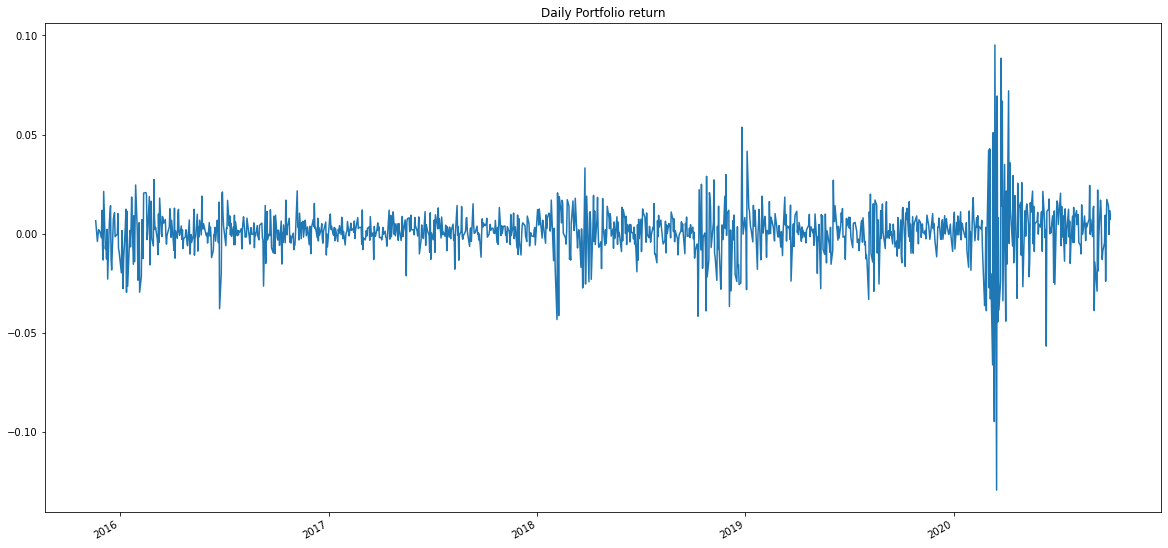

In [251]:
 # plot the daily portfolio returns
core_portfolio_returns.plot(figsize=(20,10), title="Daily Portfolio return"); 

In [252]:
# Calculating Cumulative Product
core_cumulative_returns = (1 + core_portfolio_returns).cumprod() - 1
core_cumulative_returns

2015-11-20    0.006532
2015-11-23    0.002581
2015-11-24    0.001639
2015-11-25    0.003645
2015-11-27    0.004906
                ...   
2020-09-25    1.474158
2020-09-28    1.508525
2020-09-29    1.507425
2020-09-30    1.536714
2020-10-01    1.555398
Length: 1224, dtype: float64

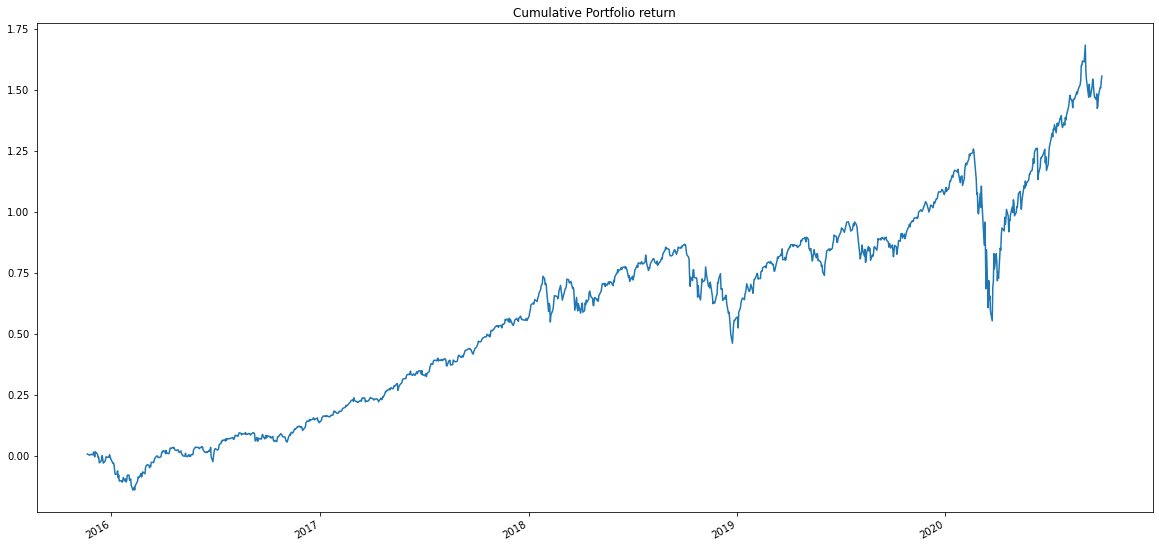

In [253]:
core_cumulative_returns.plot(figsize=(20,10), title="Cumulative Portfolio return"); 

In [254]:
#SP500 daily returns

SP500_daily_returns= Core_returns.drop(columns=['AMT', 'ORCL', 'PPG', 'COST', 'MSFT', 'UNH', 'TROW', 'BLK', 'NVDA', 'FB', 'BABA', 'CRM', 'PFE', 'NFLX', 'SQ'])

SP500_daily_returns

,SP500
2015-11-20,0.003810
2015-11-23,-0.001235
2015-11-24,0.001222
2015-11-25,-0.000129
2015-11-27,0.000594
...,...
2020-09-25,0.015977
2020-09-28,0.016111
2020-09-29,-0.004813
2020-09-30,0.008254


In [255]:
# Calculating Cumulative Product for SP500
Sp500_cumulative_returns = (1 + SP500_daily_returns).cumprod() - 1
Sp500_cumulative_returns

,SP500
2015-11-20,0.003810
2015-11-23,0.002571
2015-11-24,0.003796
2015-11-25,0.003666
2015-11-27,0.004262
...,...
2020-09-25,0.584853
2020-09-28,0.610386
2020-09-29,0.602636
2020-09-30,0.615864


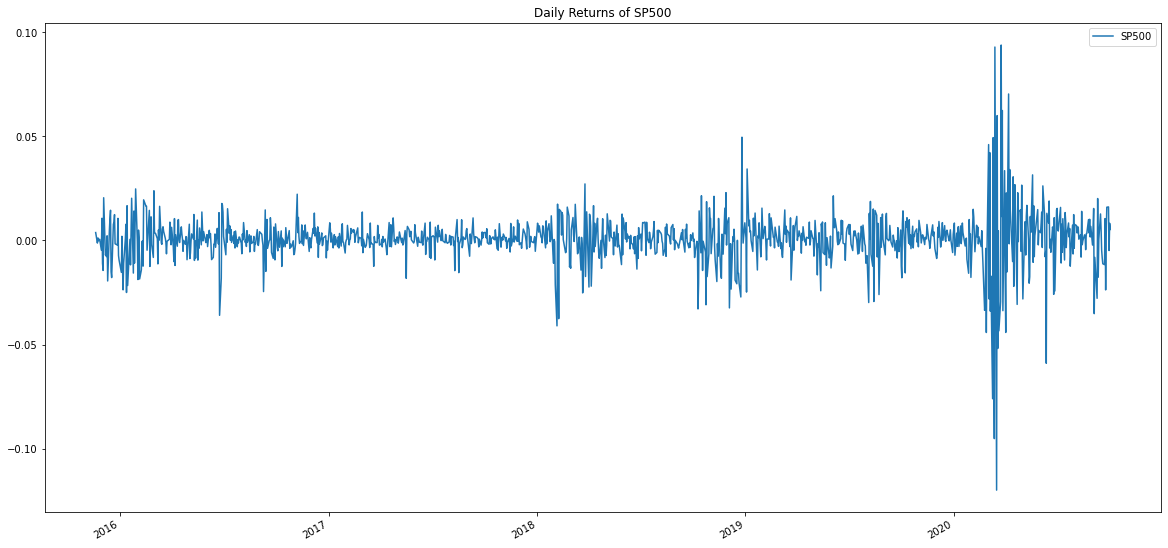

In [256]:
SP500_daily_returns.plot(figsize=(20,10), title="Daily Returns of SP500"); 

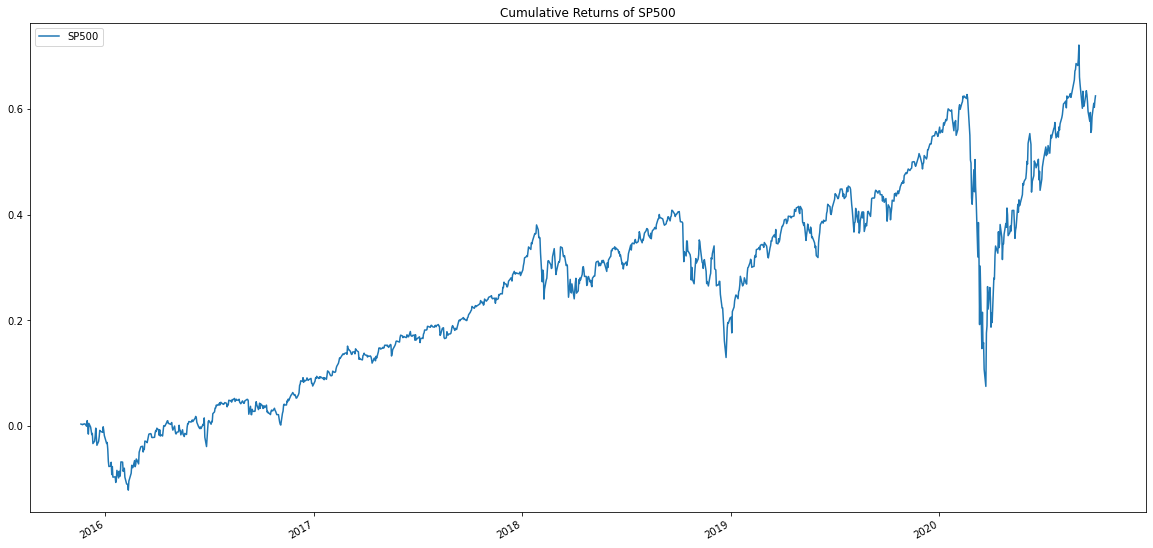

In [257]:
Sp500_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of SP500");

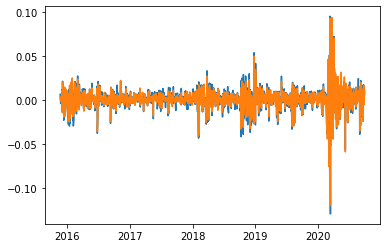

In [258]:
plt.plot(core_portfolio_returns)
plt.plot(SP500_daily_returns)
plt.show()

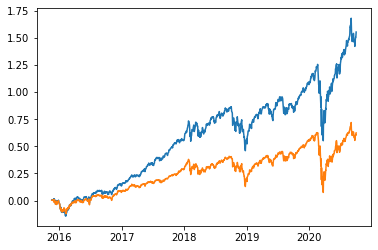

In [259]:
plt.plot(core_cumulative_returns)
plt.plot(Sp500_cumulative_returns)
plt.show()

In [262]:
#calculate Std Dev of Portfolio

print(core_portfolio_returns.std())
print(core_portfolio_returns.mean())

0.013021605893950699
0.0008521218194888947


In [261]:
sharpe_ratios = (core_portfolio_returns.mean() * 252) / (core_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

1.0388130801041227